In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
data = pd.read_csv('stud_dates_click.csv')
data

,code_module,code_presentation,id_student,final_result,-25,-24,-23,-22,-21,-20,...,260,261,262,263,264,265,266,267,268,269
0,AAA,2013J,11391,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,Fail,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,2645731,Distinction,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,2679821,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/home/ramesh/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

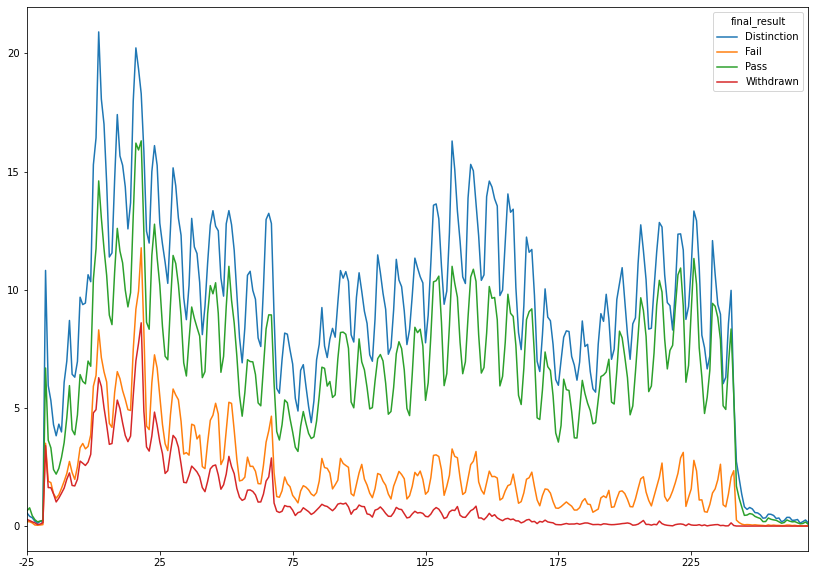

In [268]:
cols = [str(i) for i in range(-25, 270)]
data.groupby('final_result')[cols].mean().T.plot(figsize=(14, 10))

# Remove those student records who has no records on studnet VLE

We want to predict the final result of each student based on the interaction with VLE, therefore it better to keep
those students records who has atleast some interaction with VLE
<br><br>

In [269]:
data[data[cols].sum(axis=1)==0]

,code_module,code_presentation,id_student,final_result,-25,-24,-23,-22,-21,-20,...,260,261,262,263,264,265,266,267,268,269
125,AAA,2013J,292923,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,AAA,2013J,405961,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,AAA,2013J,2318055,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,AAA,2013J,2324976,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,AAA,2013J,2365101,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32459,GGG,2014J,688663,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32534,GGG,2014J,696711,Fail,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32542,GGG,2014J,697456,Fail,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32559,GGG,2014J,1890660,Fail,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [270]:
data[data[cols].sum(axis=1)==0]['final_result'].value_counts()

Withdrawn    2988
Fail          374
Pass            3
Name: final_result, dtype: int64

<br>

## It seems 3365 students has no records on studentVLE table

From above analysis we see that out of 3365 students, 2988 students Withdrawn, 374 students are Fail and 3 students are Pass.

* Withdrawn: In case of withdrawn, It is possible that student register for the course and after some time period student withdrawn from couse without interacting with VLE.  
* Fail: In case of Fail, Maybe student register for the course but did not withdrawn till the end of course that why they may have Fail status
* Pass: This is exceptional condition, without any interaction with VLE, how studnet get pass, 

These records will affect the model, therefore We will drop these records for further processing
<br><br>

In [271]:
data = data[data[cols].sum(axis=1)!=0]
data

,code_module,code_presentation,id_student,final_result,-25,-24,-23,-22,-21,-20,...,260,261,262,263,264,265,266,267,268,269
0,AAA,2013J,11391,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,Fail,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,2645731,Distinction,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,2679821,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/home/ramesh/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Average click')

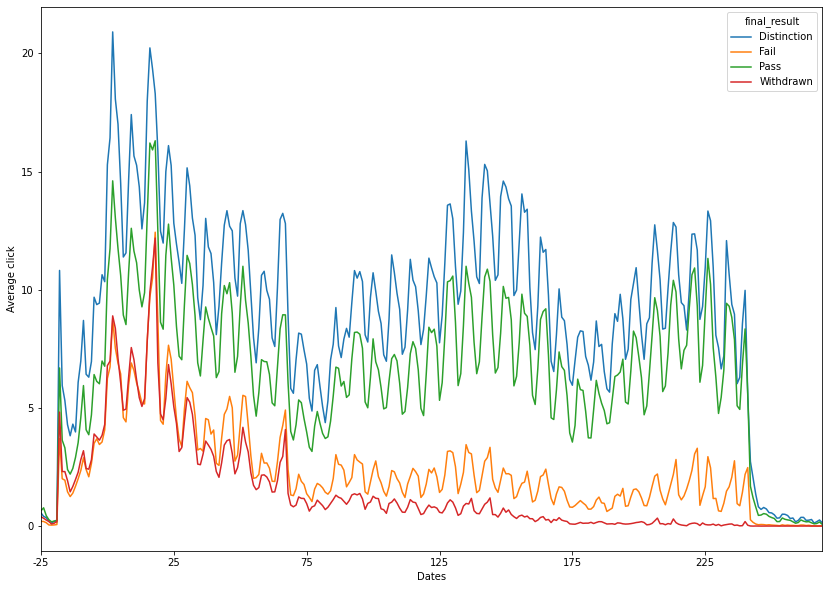

In [272]:
data.groupby('final_result')[cols].mean().T.plot(figsize=(14, 10))
plt.xlabel('Dates')
plt.ylabel('Average click')

<br>
If we compare the two graphs, we can see that the graph of withdraw and Fail is almost identical till 25 days.  After 25 to 75 dyas, the difference is noticable but after 75 days, the gap becomes bigger. 
<br>

In [273]:
data['final_result'] = data['final_result'].map({'Pass':1, 'Distinction':1, 'Withdrawn':0, 'Fail':0})

<ipython-input-273-4ea8bca590c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_result'] = data['final_result'].map({'Pass':1, 'Distinction':1, 'Withdrawn':0, 'Fail':0})


In [274]:
def prepare_data(days=50):
    cols = [str(i) for i in range(-25, days)]
    X = data[cols]
    y = data['final_result']
    return X, y

In [275]:
time_lags = 150
dataX, target = prepare_data(days=time_lags)

In [276]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataX, target, test_size=0.2, stratify=target)

In [277]:
from tensorflow.keras import utils
y_train_cat = utils.to_categorical(y_train)
y_test_cat = utils.to_categorical(y_test)

In [278]:
from tensorflow.keras.layers import Dense, Input, Conv1D, AveragePooling1D, Flatten
from tensorflow.keras import Sequential

In [279]:
model = Sequential()
model.add(Input(shape=(time_lags+25, )))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [280]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 128)               22528     
_________________________________________________________________
dense_104 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_105 (Dense)            (None, 16)                1040      
_________________________________________________________________
dense_106 (Dense)            (None, 2)                 34        
Total params: 31,858
Trainable params: 31,858
Non-trainable params: 0
_________________________________________________________________


In [281]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # categorical_crossentropy

In [282]:
history = model.fit(X_train, y_train_cat, validation_split=0.1, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
658/658 - 1s - loss: 0.5714 - accuracy: 0.7824 - val_loss: 0.4504 - val_accuracy: 0.8221
Epoch 2/10
658/658 - 1s - loss: 0.4094 - accuracy: 0.8274 - val_loss: 0.4239 - val_accuracy: 0.8328
Epoch 3/10
658/658 - 1s - loss: 0.3826 - accuracy: 0.8330 - val_loss: 0.4305 - val_accuracy: 0.8341
Epoch 4/10
658/658 - 1s - loss: 0.3620 - accuracy: 0.8406 - val_loss: 0.4168 - val_accuracy: 0.8200
Epoch 5/10
658/658 - 1s - loss: 0.3428 - accuracy: 0.8480 - val_loss: 0.4392 - val_accuracy: 0.8363
Epoch 6/10
658/658 - 1s - loss: 0.3223 - accuracy: 0.8503 - val_loss: 0.5113 - val_accuracy: 0.8350
Epoch 7/10
658/658 - 1s - loss: 0.2975 - accuracy: 0.8581 - val_loss: 0.4935 - val_accuracy: 0.8358
Epoch 8/10
658/658 - 1s - loss: 0.2696 - accuracy: 0.8671 - val_loss: 0.5610 - val_accuracy: 0.8145
Epoch 9/10
658/658 - 1s - loss: 0.2454 - accuracy: 0.8790 - val_loss: 0.6004 - val_accuracy: 0.8294
Epoch 10/10
658/658 - 1s - loss: 0.2298 - accuracy: 0.8935 - val_loss: 0.6278 - val_accuracy: 0.8025

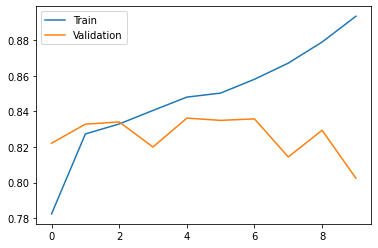

In [283]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()

In [284]:
predict = model.predict(X_test)
predict = np.argmax(predict, axis=1)

In [285]:
from sklearn.metrics import confusion_matrix, classification_report

In [286]:
pd.DataFrame(confusion_matrix(predict, y_test), columns=[0, 1], index=[0,1])

,0,1
0,2202,603
1,567,2474


In [287]:
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      2805
           1       0.80      0.81      0.81      3041

    accuracy                           0.80      5846
   macro avg       0.80      0.80      0.80      5846
weighted avg       0.80      0.80      0.80      5846



# lets try with CNN1D

In [288]:
X_train = np.array(X_train)
X_test = np.array(X_test)

# reshape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [289]:
model2 = Sequential()
model2.add(Input(shape=(time_lags+25, 1)))
model2.add(Conv1D(32, kernel_size=2, activation='relu'))
model2.add(AveragePooling1D(2))
model2.add(Conv1D(64, kernel_size=2, activation='relu'))
model2.add(AveragePooling1D(2))
model2.add(Conv1D(128, kernel_size=2, activation='relu'))
model2.add(AveragePooling1D(2))
model2.add(Flatten())
model2.add(Dense(128,  activation='relu'))
model2.add(Dense(64,  activation='relu'))
model2.add(Dense(32,  activation='relu'))
model2.add(Dense(2,  activation='sigmoid')) #softmax

In [290]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model2.fit(X_train, y_train_cat, validation_split=0.1, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
658/658 - 8s - loss: 0.4023 - accuracy: 0.8289 - val_loss: 0.4046 - val_accuracy: 0.8427
Epoch 2/10
658/658 - 8s - loss: 0.3663 - accuracy: 0.8384 - val_loss: 0.3566 - val_accuracy: 0.8380
Epoch 3/10
658/658 - 7s - loss: 0.3585 - accuracy: 0.8417 - val_loss: 0.3581 - val_accuracy: 0.8435
Epoch 4/10
658/658 - 7s - loss: 0.3511 - accuracy: 0.8418 - val_loss: 0.3565 - val_accuracy: 0.8410
Epoch 5/10
658/658 - 7s - loss: 0.3428 - accuracy: 0.8463 - val_loss: 0.3636 - val_accuracy: 0.8392
Epoch 6/10
658/658 - 7s - loss: 0.3374 - accuracy: 0.8500 - val_loss: 0.3670 - val_accuracy: 0.8345
Epoch 7/10
658/658 - 7s - loss: 0.3236 - accuracy: 0.8548 - val_loss: 0.3601 - val_accuracy: 0.8392
Epoch 8/10
658/658 - 8s - loss: 0.3030 - accuracy: 0.8663 - val_loss: 0.3849 - val_accuracy: 0.8418
Epoch 9/10
658/658 - 7s - loss: 0.2835 - accuracy: 0.8775 - val_loss: 0.3968 - val_accuracy: 0.8298
Epoch 10/10
658/658 - 7s - loss: 0.2541 - accuracy: 0.8910 - val_loss: 0.4294 - val_accuracy: 0.8311

Text(0, 0.5, 'Accuracy')

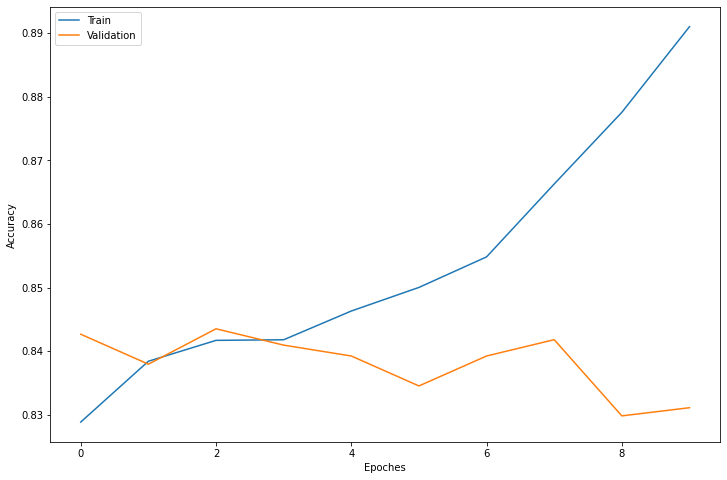

In [292]:
plt.figure(figsize=(12, 8))
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Validation')
plt.legend()
plt.xlabel('Epoches')
plt.ylabel('Accuracy')

In [293]:
predict = model2.predict(X_test)
predict = np.argmax(predict, axis=1)
pd.DataFrame(confusion_matrix(predict, y_test), columns=[0, 1], index=[0,1])

,0,1
0,2120,346
1,649,2731


In [294]:
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      2466
           1       0.89      0.81      0.85      3380

    accuracy                           0.83      5846
   macro avg       0.83      0.83      0.83      5846
weighted avg       0.84      0.83      0.83      5846

